# TP 3 de Statistique descriptive avec SAS

Objectifs de la séance : 
* Faire une analyse du lien entre deux variables qualitatives,
* Utiliser les formats,
* Faire une analyse de deux variables quantitatives.


## Exercice 1 : Étude de la mobilité sociale intergénérationnelle

Dans cet exercice, on va considérer la table *fqp*. Cette table contient pour chaque individu (individu) sa catégorie socioprofessionelle (CSFils) et celle de son père (CSPere). On retrouve également une variable identificatrice (id).

**Question 1** : Créez une bibliothèque *source* qui contiendra les données en lecture seule. Créez également une bibliothèque *resultat* qui contiendra les résultats de vos exercices

In [4]:
LIBNAME source "/folders/myfolders/Donnees_TP_SAS/TP3/source" ACCESS = READONLY;
LIBNAME resultat "/folders/myfolders/Donnees_TP_SAS/TP3/resultat";

**Question 2** : Combien de variables non numérique contient cette table ? Combien d'observations ?

**Question 3** : À l'aide d'une procédure FREQ, affichez le nombre de modalités des variables CSFils et CSPere.

**Question 4** : Créez un format CS qui associe à 
* "1" $\longrightarrow$ Agriculture
* "2" $\longrightarrow$ Artisan
* "3" $\longrightarrow$ Cadre et PIS
* "4" $\longrightarrow$ Professions intermédiaires
* "5" $\longrightarrow$ Employé
* "6" $\longrightarrow$ Ouvrier

**Question 5** : Affichez le tableau de contingence des variables CSFils (en ligne) et CSPere (en colonne). On appliquera ces deux variables le format CS.

**Question 6** : Affichez le tableau des fréquences conditionnelles par ligne (aussi appelé tableau des profils-lignes). Les sociologues appellent cette table la table des recrutements. Pourquoi ? Comment interpréter le 88.42% à l'intersection des modalités Agriculture des deux variables ?

Dans une situation de fluidité sociale, comment serait la table des recrutements ? Quid dans le cas d'une absence totale de mobilité sociale ?

**Question 7** : Calculez la statistique du Khi-Deux des variables CS1 et CS2. 

Imaginons qu'on s'intéresse au lien entre les variables CS1 et CS2 directement sur les personnes interrogés sans prendre en compte la pondération (soit 6 947 individus). La pondération étant uniforme (même poids pour chaque individu), est-ce que les distributions (au sens des fréquences) de chacunes des variables changent ? Calculez la statistique du Khi-Deux des variables CS1 et CS1 sur les 6 947 individus interrogés. Que remarquez-vous ? Donnez un "inconvénient" de cette statistique.

## Exercice 2 : Étude de l'offre d'équipements

**Question 8** : Affichez les dix premières lignes de la table *equipement* et affichez des informations générales dessus. 

In [5]:
PROC PRINT DATA = source.equipement(obs = 10);
RUN;

Obs,ComInsee,Type,Effectif
1,2001,101,0
2,2001,102,0
3,2001,103,0
4,2001,104,0
5,2001,105,0
6,2001,106,0
7,2001,201,0
8,2001,202,1
9,2001,203,0
10,2001,301,0


In [6]:
PROC CONTENTS DATA = source.equipement;
RUN;

**Question 9** : La variable COMINSEE correspond au code géographique de la commune (il est différent du code postal). Néanmoins, ce code est censé être sur cinq positions (i.e de la forme xxxxx). Est-ce le cas pour toutes les communes ? Utilisez un format prédéfini adapté pour afficher correctement les codes géographiques. 

La table après application du format se nommera *equipement* et sera stockée dans la bibliothèque *resultat*.

**Réponse** : L'idée est de faire utiliser le format *Zn.* Je l'avais évoqué en cours de SAS début septembre.

In [7]:
DATA resultat.equipement;
SET source.equipement;
FORMAT COMINSEE Z5.;
RUN;

**Question 10** : La table *libelle* contient deux variables permettant de faire le lien entre le numéro d'une activité (*Numero*) et le nom de l'activité (*Libelle*). À partir de cette table, créez le format *nomactivite* qui à un numéro d'activité associera le nom de l'activité.

In [ ]:
DATA format_lien;
SET source.libelle;
fmtname = "nomactivite";
RENAME numero = start
libelle = label;
RUN;

PROC FORMAT CNTLIN = format_lien;
RUN;

**Question 11** : Calculez le nombre total d'équipements par commune et stockez les résultats dans une table *nb_eq_com* dans la bibliothèque *resultat*. On n'affichera pas les résultats.
La table *nb_eq_com* ne contiendra que deux variables : ComInsee (numéro de la commune) et nb_equip_tot (nombre total d'équipements).

In [9]:
PROC MEANS DATA = source.equipement SUM NOPRINT;
VAR EFFECTIF;
BY COMINSEE;
OUTPUT OUT = resultat.nb_eq_com(keep=COMINSEE nb_equip_tot) SUM = nb_equip_tot;
RUN;

In [ ]:
proc print data = resultat.nb_eq_com;
run;

**Question 12** : À l'aide d'une étape DATA, ajoutez le libellé "Code géographique officiel (COG)" à la variable *COMINSEE* et le libellé "Nombre d'équipements" à la variable *nb_equip_tot*.

In [12]:
DATA resultat.nb_eq_com;
SET resultat.nb_eq_com;
LABEL COMINSEE = "Code géographique officiel (COG)"
nb_equip_tot = "Nombre d'équipements";
RUN;

**Question 13** : Calculez le nombre d'équipements par département. On stockera les résultats dans la table *nb_eq_dep* dans la bibliothèque *resultat*.

Remarque : Le département correspond aux deux premières positions du code géographique officiel (donc sur cinq positions). On pourra ajouter une variable *dep* à la table *nb_eq_com* en utilisant les fonctions PUT et SUBSTR.

**Note pour les chargés de TP** : Cette question est intéressante dans la mesure où elle rappelle que si les élèves utilisent la fonction SUBSTR directement sur la variable COMINSEE alors on n'obtiendra pas le résultat voulu car la variable est numérique. Il faut donc la transformer en caractère en utilisant la fonction PUT et le format Z5. (pour bien afficher le cog sur 5 positions) puis appliquer la fonction SUBSTR en ne gardant que les deux premières positions.

In [ ]:
DATA resultat.nb_eq_com;
SET resultat.nb_eq_com;
cominsee_carac = PUT(COMINSEE, Z5.);
DEP = SUBSTR(cominsee_carac, 1,2);
DROP cominsee_carac;
RUN;

In [ ]:
PROC MEANS DATA = resultat.nb_eq_com NOPRINT;
VAR nb_equip_tot;
BY DEP;
OUTPUT OUT = resultat.nb_eq_dep(keep=DEP nb_equip_tot_dep) SUM = nb_equip_tot_dep;
RUN;

**Question 14** : Affichez des informations générales sur la table *population*.

In [ ]:
PROC CONTENTS data = source.population;
RUN;

**Question 15** : Ajoutez une variable de type texte COMINSEE qui contiendra le code officiel géographique de chaque commune. Cette nouvelle table sera enregistré dans la bibliothèque *resultat* et se nommera *population*. 

Le code officiel géographique est la concaténation du code du département et du code de la commune.

In [13]:
DATA resultat.population;
SET source.population;
LENGTH COMINSEE $5;
COMINSEE = CATS(code_dep,code_com);
RUN;

**Question 16** : Créez la table *pop_equip_com* dans la bibliothèque *resultat* qui contiendra pour chaque observation (ici les communes) : 
* une variable ComInsee qui correspondra au code géographique officiel de la commune,
* une variable nb_equip_tot qui correspondra au nombre total d'équipements de la commune,
* une variable pop_tot qui correspondra au nombre d'habitants de la commune.

On ne gardera que les communes dont on connaît le nombre d'équipements. On se servira de la table *population* créée à la question précédente.

**Note pour les chargés de TP** : L'idée est qu'ils fassent un MERGE entre la table population et la table nb_eq_com. Le problème est que dans la table nb_eq_com la variable COMINSEE est numérique alors qu'elle est caractère dans la table population. Ils devront utiliser les fonctions PUT et INPUT avant !

Bien faire attention à définir la taille des variables.

Dans le cours j'ai parlé de l'opérateur !! pour concaténer deux chaînes de caractères. Là, il faut faire une concaténation sans espace donc utiliser la fonction CATS ... Laissez les faire une petite recherche sur Internet.

In [ ]:
DATA nb_eq_com_tempo;
SET resultat.nb_eq_com;
LENGTH COMINSEE2 $5;
COMINSEE2 = PUT(COMINSEE, Z5.);
DROP COMINSEE;
RENAME COMINSEE2 = COMINSEE;
RUN;

In [ ]:
PROC SORT DATA = nb_eq_com_tempo;
BY COMINSEE;
RUN;

PROC SORT DATA = resultat.population;
BY COMINSEE;
RUN;

DATA resultat.pop_equi_com;
MERGE nb_eq_com_tempo(in = eq) resultat.population(in = pop);
IF eq then OUTPUT;
KEEP COMINSEE NB_EQUIP_TOT POP_TOT;
BY COMINSEE;
RUN;

**Question 17** : De quels types (quantitatives ou qualitatives) sont les variables NB_EQUIP_TOT et POP_TOT ? 

Qualitative

**Question 18** : À l'aide d'un graphique, mettez en lumière le lien entre ces deux variables.


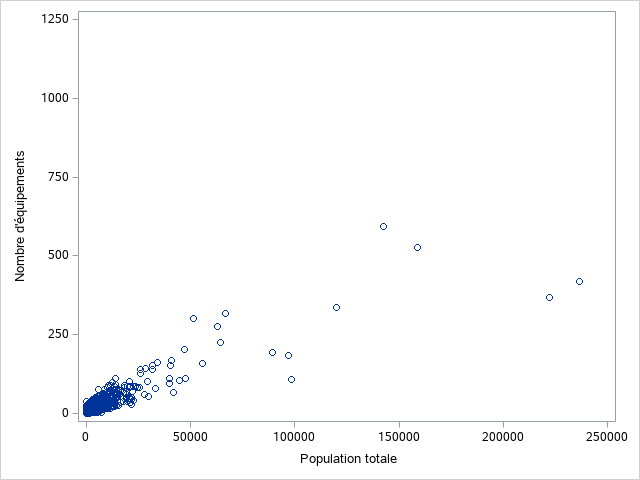

In [3]:
PROC SGPLOT DATA = resultat.pop_equi_com;
SCATTER X = POP_TOT Y = NB_EQUIP_TOT;
RUN;

**Question 19** : Quel indicateur permet de mesurer le lien linéaire entre deux variables qualitatives ? Rappelez la formule de ce coefficient.
Utilisez la procédure CORR pour calculer cettt statistique entre la variable POP_TOT et NB_EQUIP_TOT.

**Réponse** : Soient $X = (x_1, ..., x_n)$ et $Y = (y_1, ..., y_n)$, deux variables quantitatives. On appelle coefficient de corrélation de Pearson, la statistique définie par $\displaystyle \rho(X,Y) = \frac{\text{Cov}(X,Y)}{\text{Var}(X)}$. 

Ce coefficient est compris entre -1 et 1 d'après l'inégalité de Cauchy-Schwartz. 
Un coefficient de 0 ne signifie pas une absence de lien (mais de lien linéaire).
Un coefficient égal à -1 ou 1 signifie que le lien entre les deux variables est purement affine (avec une pente non nulle) (la réciproque est vraie).
Pour autant, un coefficient proche de -1 et 1 mais différent ne permet pas de conclure que les points sont alignés ...

In [ ]:
PROC CORR DATA = resultat.pop_equi_com;
RUN;

**Question 20** : On considère le modèle de régression linéaire de *nb_equip_tot* sur *pop_tot* : $\text{nb_equip_tot} = \alpha + \beta \times \text{pop_tot}$. On note $(\hat \alpha, \hat \beta)$, les estimations des coefficients obtenues par la méthode des moindres carrés ordinaires. 

Rappelez en quoi consiste la méthode des moindres carrés ordinaires et donnez une expression analytique des coefficients $(\hat \alpha, \hat \beta)$.

Quel est le lien entre $\hat \beta$ et le coefficient de corrélation de Pearson des variables *nb_equi_tot* et *pop_tot* ?

À l'aide de la procédure REG, donnez les valeurs de ces coefficients.

Pour rappel : $\displaystyle \hat \beta = \frac{Cov(nb\_equip\_tot, pop\_tot)}{Var(pop\_tot)}= \rho(nb\_equip\_tot,pop\_tot) \times \frac{\sqrt{Var(nb\_equip\_tot)}}{\sqrt{Var(pop\_tot)}}$


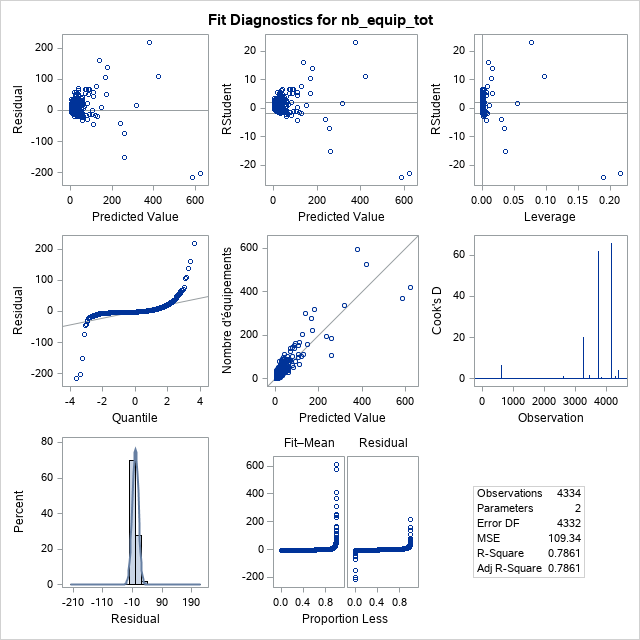
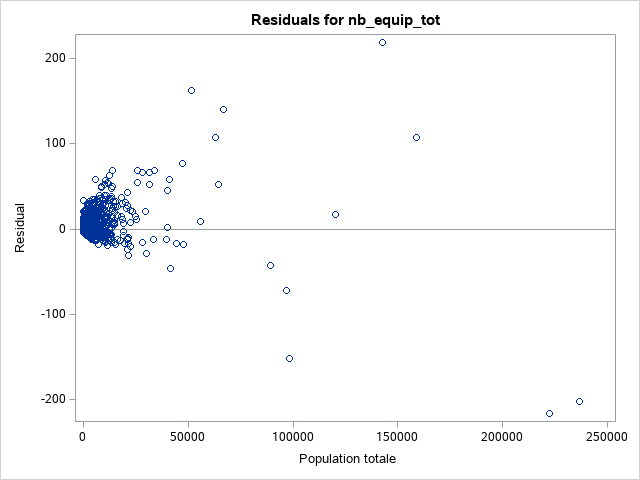
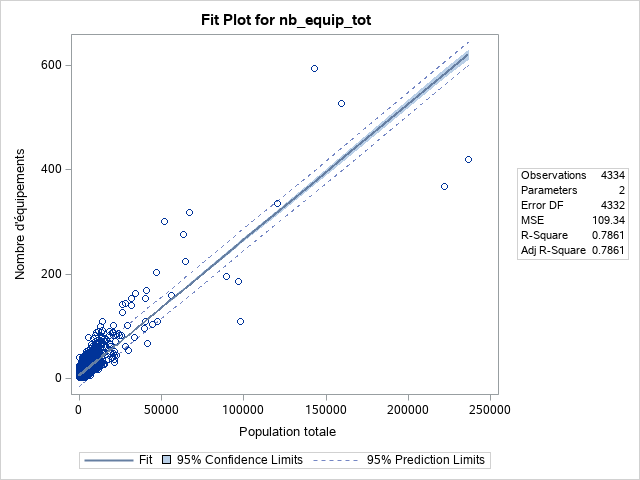

In [15]:
PROC REG DATA = resultat.pop_equi_com;
MODEL NB_EQUIP_TOT = POP_TOT;
RUN;